In [23]:
import yfinance as yf
import pandas as pd
from scipy.stats import linregress
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib notebook

In [27]:
#read in SPY/COVID file as DF 
SPYdf = pd.read_csv('OutputData/SPYCOVID.csv',thousands=',', parse_dates=[0])
SPYdf


,Submission Date,Open,High,Low,Close,Volume,Amplitude,Daily Change,Daily Change %,Ticker,Total Cases,Daily New Cases,Total Deaths,Daily New Deaths
0,2020-01-22,324.024406,324.716871,322.980888,323.146667,48914900,1.735983,-0.877739,-0.27,SPY,33,33,0,0
1,2020-01-23,322.454230,323.956157,321.264397,323.517273,51963000,2.691761,1.063043,0.33,SPY,35,2,0,0
2,2020-01-24,324.219459,324.307230,319.265061,320.640198,87578400,5.042170,-3.579262,-1.10,SPY,36,1,0,0
3,2020-01-27,315.042201,317.080516,314.681355,315.500580,84062500,2.399161,0.458379,0.15,SPY,43,1,0,0
4,2020-01-28,317.021967,319.742985,315.598078,318.806732,63834000,4.144907,1.784765,0.56,SPY,44,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2021-08-20,440.230011,443.709991,439.709991,443.359985,71975900,4.000000,3.129974,0.71,SPY,37671394,160857,627325,999
400,2021-08-23,445.160004,448.230011,443.440002,447.260010,54973000,4.790009,2.100006,0.47,SPY,38037577,112020,629220,703
401,2021-08-24,447.970001,448.540009,447.420013,447.970001,38744700,1.119995,0.000000,0.00,SPY,38192607,154363,630408,1184
402,2021-08-25,448.170013,449.459991,447.769989,448.910004,40529700,1.690002,0.739990,0.17,SPY,38360956,162485,631563,1138


<IPython.core.display.Javascript object>


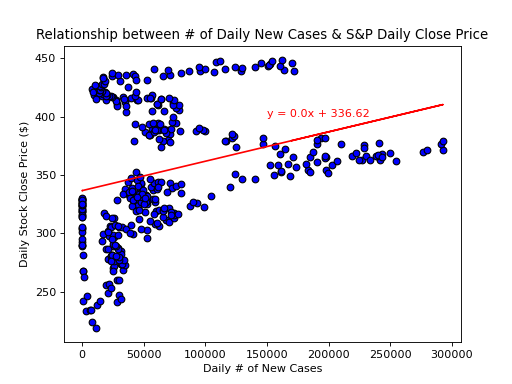

The correlation between both factors is 0.3
The r-squared is: 0.09090648927095467


In [28]:
plt.figure()
x_values = SPYdf['Daily New Cases']
y_values = SPYdf['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values,facecolors="blue", edgecolors ="black") 
plt.title('Relationship between # of Daily New Cases & S&P Daily Close Price')
plt.xlabel("Daily # of New Cases")
plt.ylabel('Daily Stock Close Price ($)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000, 400),fontsize=10,color="red")
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('OutputData/DailyCases_StockPrice_Scatter.png')

<IPython.core.display.Javascript object>


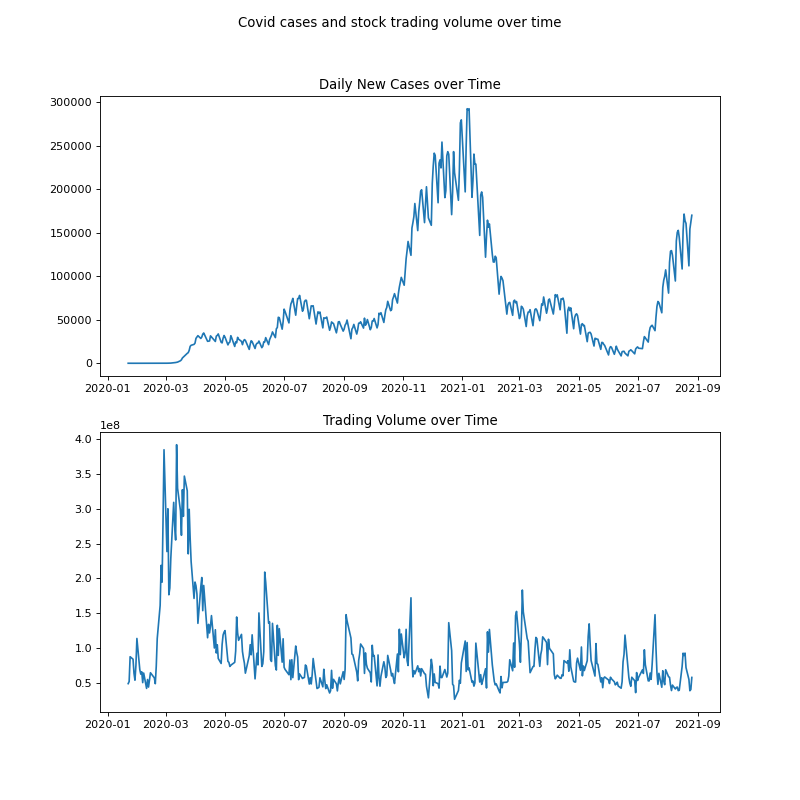

In [29]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
ax1.plot(SPYdf['Submission Date'], SPYdf['Daily New Cases'])
ax2.plot(SPYdf['Submission Date'], SPYdf['Volume'])
fig.suptitle('Covid cases and stock trading volume over time')
ax1.set_title('Daily New Cases over Time')
ax2.set_title('Trading Volume over Time')
plt.savefig('OutputData/DailyCases_TradingVolume_OverTime_Line.png')
plt.show()


<IPython.core.display.Javascript object>


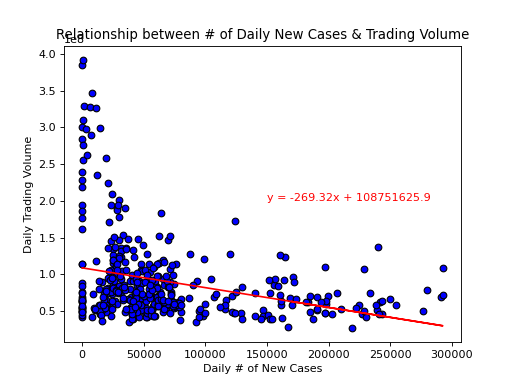

The correlation between both factors is -0.3
The r-squared is: 0.09065532050250791


In [30]:
plt.figure()
x_values = SPYdf['Daily New Cases']
y_values = SPYdf['Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values,facecolors="blue", edgecolors ="black") 
plt.title('Relationship between # of Daily New Cases & Trading Volume')
plt.xlabel("Daily # of New Cases")
plt.ylabel('Daily Trading Volume')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000, 200000000),fontsize=10,color="red")
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('OutputData/DailyCases_TradingVolume_Scatter.png')


<IPython.core.display.Javascript object>


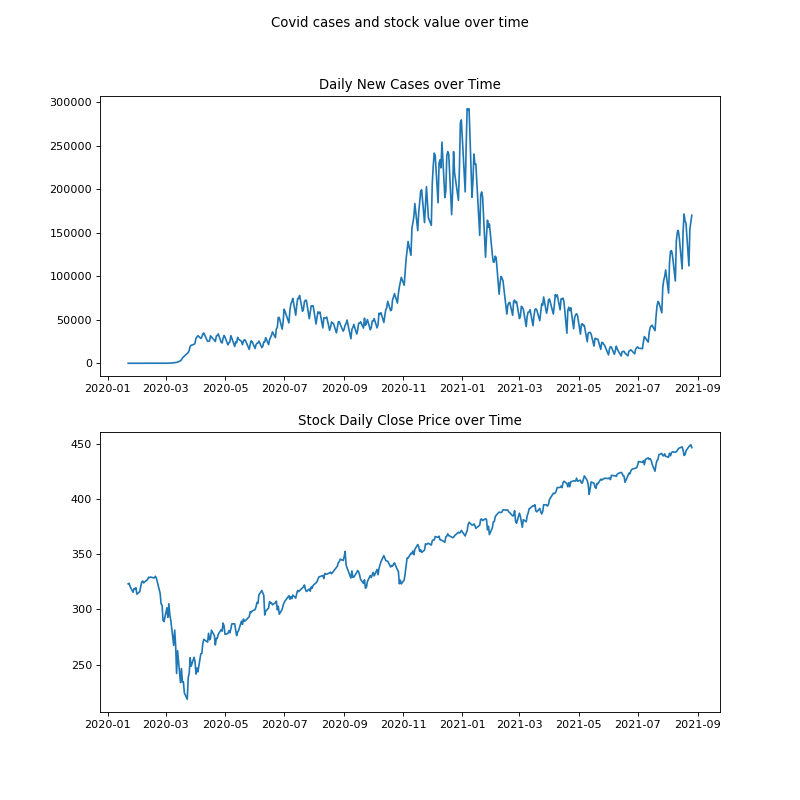

In [31]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
ax1.plot(SPYdf['Submission Date'], SPYdf['Daily New Cases'])
ax2.plot(SPYdf['Submission Date'], SPYdf['Close'])
fig.suptitle('Covid cases and stock value over time')
ax1.set_title('Daily New Cases over Time')
ax2.set_title('Stock Daily Close Price over Time')
plt.savefig('OutputData/DailyCases_ClosePrice_OverTime_Line.png')
plt.show()


<IPython.core.display.Javascript object>


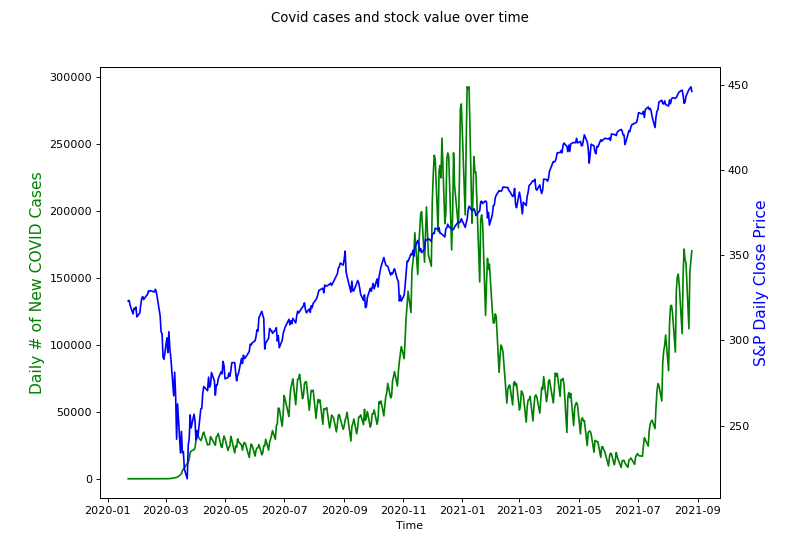

In [32]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,7))
# make a plot
ax.plot(SPYdf['Submission Date'], SPYdf['Daily New Cases'], color="green")
# set x-axis label
ax.set_xlabel("Time")
# set y-axis label
ax.set_ylabel("Daily # of New COVID Cases",color="green",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(SPYdf['Submission Date'], SPYdf['Close'],color="blue")
ax2.set_ylabel("S&P Daily Close Price",color="blue",fontsize=14)
fig.suptitle('Covid cases and stock value over time')
plt.show()
# save the plot as a file
fig.savefig('OutputData/DailyCases_SPYClosePrice_OverTime_Line_2.png')


<IPython.core.display.Javascript object>


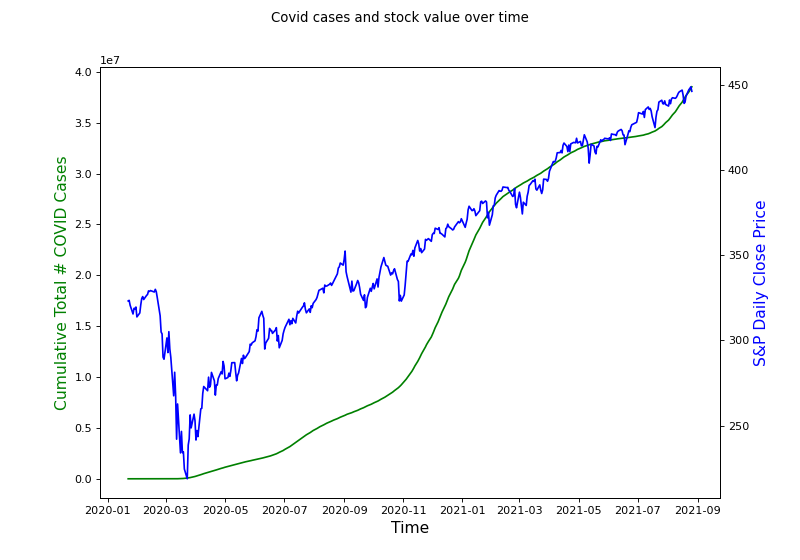

In [33]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,7))
# make a plot
ax.plot(SPYdf['Submission Date'], SPYdf['Total Cases'], color="green")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("Cumulative Total # COVID Cases",color="green",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(SPYdf['Submission Date'], SPYdf['Close'],color="blue")
ax2.set_ylabel("S&P Daily Close Price",color="blue",fontsize=14)
fig.suptitle('Covid cases and stock value over time')
plt.show()
# save the plot as a file
fig.savefig('OutputData/TotalCases_SPYClosePrice_OverTime_Line_2.png')


<IPython.core.display.Javascript object>


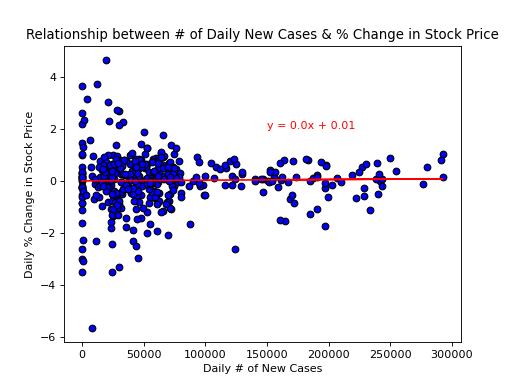

The correlation between both factors is 0.02
The r-squared is: 0.00027827142654911425


In [34]:
plt.figure()
x_values = SPYdf['Daily New Cases']
y_values = SPYdf['Daily Change %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values,facecolors="blue", edgecolors ="black") 
plt.title('Relationship between # of Daily New Cases & % Change in Stock Price')
plt.xlabel("Daily # of New Cases")
plt.ylabel('Daily % Change in Stock Price')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000, 2),fontsize=10,color="red")
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('OutputData/DailyCases_Stock%Change_Scatter.png')


# some test plots for potential questions